In [5]:
import numpy as np
import pandas as pd
import requests
from tqdm import tqdm

import matplotlib.pyplot as plt

In [6]:
# Defines the base URL for the API endpoint. This URL is used to send RESTful requests to the local server hosting the deployed test case
url = 'http://127.0.0.1:5000'

# RESTful API
Note:The API will return a JSON in the form {"status":<status_code_int>, "message":<message_str>, "payload":<relevant_return_data>}.

Status codes in "status" are integers: 200 for successful with or without warning, 400 for bad input error, or 500 for internal error.

Data returned in "payload" is the data of interest relvant to the specific API request, while the string in "message" will report any warnings or error messages to help debug encountered problems.

In [7]:
# Receive control signal point names (u) and metadata.
input_info=requests.get('{0}/inputs'.format(url)).json()
input_info

{'message': 'Queried the inputs successfully.',
 'payload': {'CDWP01_ONOFF': {'Description': 'Condenser water pump 01 valve OPEN/CLOSE [0 or 1]'},
  'CDWP01_rpm': {'Description': 'Condenser water pump 01 rotating speed [rpm]'},
  'CDWP02_ONOFF': {'Description': 'Condenser water pump 02 valve OPEN/CLOSE [0 or 1]'},
  'CDWP02_rpm': {'Description': 'Condenser water pump 02 rotating speed [rpm]'},
  'CDWP03_ONOFF': {'Description': 'Condenser water pump 03 valve OPEN/CLOSE [0 or 1]'},
  'CDWP03_rpm': {'Description': 'Condenser water pump 03 rotating speed [rpm]'},
  'CDWP04_ONOFF': {'Description': 'Condenser water pump 04 valve OPEN/CLOSE [0 or 1]'},
  'CDWP04_rpm': {'Description': 'Condenser water pump 04 rotating speed [rpm]'},
  'CDWP05_ONOFF': {'Description': 'Condenser water pump 05 valve OPEN/CLOSE [0 or 1]'},
  'CDWP05_rpm': {'Description': 'Condenser water pump 05  rotating speed [rpm]'},
  'CDWP06_ONOFF': {'Description': 'Condenser water pump 06 valve OPEN/CLOSE [0 or 1]'},
  'CDWP

In [8]:
# Receive sensor signal point names (y) and metadata.
measurements_info=requests.get('{0}/measurements'.format(url)).json()
measurements_info

{'message': 'Queried the measurements successfully.',
 'payload': {'H_CDWP1': {'Description': 'Condenser water pump 01 head [m]'},
  'H_CDWP2': {'Description': 'Condenser water pump 02 head [m]'},
  'H_CDWP3': {'Description': 'Condenser water pump 03 head [m]'},
  'H_CDWP4': {'Description': 'Condenser water pump 04 head [m]'},
  'H_CDWP5': {'Description': 'Condenser water pump 05 head [m]'},
  'H_CDWP6': {'Description': 'Condenser water pump 06 head [m]'},
  'H_CHWP1': {'Description': 'Chilled water pump 01 head [m]'},
  'H_CHWP2': {'Description': 'Chilled water pump 02 head [m]'},
  'H_CHWP3': {'Description': 'Chilled water pump 03 head [m]'},
  'H_CHWP4': {'Description': 'Chilled water pump 04 head [m]'},
  'H_CHWP5': {'Description': 'Chilled water pump 05 head [m]'},
  'H_CHWP6': {'Description': 'Chilled water pump 06 head [m]'},
  'P_CDWPs_sum': {'Description': 'The sum of condenser water pump power [W]'},
  'P_CHWPs_sum': {'Description': 'The sum of chilled water pump power [W]'},

In [9]:
# Receive test case name.
name=requests.get('{0}/name'.format(url)).json()
name

{'message': 'Queried the name of the test case successfully.',
 'payload': {'name': 'AlphaDataCenter_Gym'},
 'status': 200}

In [10]:
# Receive AlphaDataCenter version.
version=requests.get('{0}/version'.format(url)).json()
version

{'message': 'Queried the version number successfully.',
 'payload': {'version': '0.1.0-dev'},
 'status': 200}

In [11]:
# Set the time step in seconds, 300 indicates 5 minutes. Note:step must be a multiple of 300. For example, valid values include 300, 600, 900, etc
step=300
requests.put('{0}/step'.format(url),
                                json={'step': step }).json()
# Initialize simulation to a start time
res=requests.put('{0}/initialize'.format(url),
                                json={'start_time': 0}).json()
res

{'message': 'Simulation initialized successfully to 0.0s',
 'payload': {'CDWP01_ONOFF': 1.0,
  'CDWP01_rpm': 900.0,
  'CDWP02_ONOFF': 0.0,
  'CDWP02_rpm': 0.0,
  'CDWP03_ONOFF': 0.0,
  'CDWP03_rpm': 0.0,
  'CDWP04_ONOFF': 0.0,
  'CDWP04_rpm': 0.0,
  'CDWP05_ONOFF': 0.0,
  'CDWP05_rpm': 0.0,
  'CDWP06_ONOFF': 0.0,
  'CDWP06_rpm': 0.0,
  'CHI01': 0.0,
  'CHI01_CHW1': 0.0,
  'CHI01_CHW2': 0.0,
  'CHI01_CHW3': 0.0,
  'CHI01_CHW4': 0.0,
  'CHI01_CW1': 0.0,
  'CHI01_CW2': 0.0,
  'CHI01_CW3': 0.0,
  'CHI01_CW4': 0.0,
  'CHI02': 0.0,
  'CHI02_CHW1': 0.0,
  'CHI02_CHW2': 1.0,
  'CHI02_CHW3': 1.0,
  'CHI02_CHW4': 0.0,
  'CHI02_CW1': 0.0,
  'CHI02_CW2': 1.0,
  'CHI02_CW3': 1.0,
  'CHI02_CW4': 0.0,
  'CHI03': 0.0,
  'CHI03_CHW1': 0.0,
  'CHI03_CHW2': 0.0,
  'CHI03_CHW3': 0.0,
  'CHI03_CHW4': 0.0,
  'CHI03_CW1': 0.0,
  'CHI03_CW2': 0.0,
  'CHI03_CW3': 0.0,
  'CHI03_CW4': 0.0,
  'CHI04': 0.0,
  'CHI04_CHW1': 0.0,
  'CHI04_CHW2': 0.0,
  'CHI04_CHW3': 0.0,
  'CHI04_CHW4': 0.0,
  'CHI04_CW1': 0.0,
  'C

In [12]:
# Load the example actions
df = pd.read_csv('RealWorld_Actions_Observations.csv')
df2 = df[
    ['U_CT1', 'U_CT2', 'U_CT3', 'U_CT4', 'U_CT5', 'U_CT6', 'Ffan_CT1_01', 'Ffan_CT1_02', 'Ffan_CT2_01', 'Ffan_CT2_02',
     'Ffan_CT3_01', 'Ffan_CT3_02', 'Ffan_CT4_01', 'Ffan_CT4_02', 'Ffan_CT5_01', 'Ffan_CT5_02', 'Ffan_CT6_01',
     'Ffan_CT6_02', 'CDWP01_rpm', 'CDWP02_rpm', 'CDWP03_rpm', 'CDWP04_rpm', 'CDWP05_rpm', 'CDWP06_rpm', 'CHWP01_rpm',
     'CHWP02_rpm', 'CHWP03_rpm', 'CHWP04_rpm', 'CHWP05_rpm', 'CHWP06_rpm', 'CHI01', 'CHI02', 'CHI03', 'CHI04', 'CHI05',
     'CHI06', 'CHI01_CW1', 'CHI01_CW2', 'CHI01_CW3', 'CHI01_CW4', 'CHI02_CW1', 'CHI02_CW2', 'CHI02_CW3', 'CHI02_CW4',
     'CHI03_CW1', 'CHI03_CW2', 'CHI03_CW3', 'CHI03_CW4', 'CHI04_CW1', 'CHI04_CW2', 'CHI04_CW3', 'CHI04_CW4',
     'CHI05_CW1', 'CHI05_CW2', 'CHI05_CW3', 'CHI05_CW4', 'CHI06_CW1', 'CHI06_CW2', 'CHI06_CW3', 'CHI06_CW4',
     'CHI01_CHW1', 'CHI01_CHW2', 'CHI01_CHW3', 'CHI01_CHW4', 'CHI02_CHW1', 'CHI02_CHW2', 'CHI02_CHW3', 'CHI02_CHW4',
     'CHI03_CHW1', 'CHI03_CHW2', 'CHI03_CHW3', 'CHI03_CHW4', 'CHI04_CHW1', 'CHI04_CHW2', 'CHI04_CHW3', 'CHI04_CHW4',
     'CHI05_CHW1', 'CHI05_CHW2', 'CHI05_CHW3', 'CHI05_CHW4', 'CHI06_CHW1', 'CHI06_CHW2', 'CHI06_CHW3', 'CHI06_CHW4',
     'CDWP01_ONOFF', 'CDWP02_ONOFF', 'CDWP03_ONOFF', 'CDWP04_ONOFF', 'CDWP05_ONOFF', 'CDWP06_ONOFF', 'CHWP01_ONOFF',
     'CHWP02_ONOFF', 'CHWP03_ONOFF', 'CHWP04_ONOFF', 'CHWP05_ONOFF', 'CHWP06_ONOFF', 'CWP_speedInput', 'Tchws_set_CHI',
     'Tchws_set_HEX', 'CWP_activatedNumber']]

P_CDWPs_sum=[]
P_CHWPs_sum=[]
times=[]
t=0
active_observations=['P_CDWPs_sum','P_CHWPs_sum']
total_steps=2000
for i in tqdm(range(total_steps)):
    u=df2.iloc[i].to_dict()
    # Advance simulation with control input and receive measurements.
    output=requests.post('{0}/advance'.format(url), json=u).json()['payload']

    for obs_name in active_observations:
        if obs_name=='P_CDWPs_sum':
            P_CDWPs_sum.append(output[obs_name])
        elif obs_name=='P_CHWPs_sum':
            P_CHWPs_sum.append(output[obs_name])
    times.append(t)
    t+=step
df=pd.DataFrame({'time':times,'P_CDWPs_sum':P_CDWPs_sum,'P_CHWPs_sum':P_CHWPs_sum})
df.to_csv('Pumps_P_Pyfmi_mlp_restapi.csv')

100%|██████████| 2000/2000 [03:29<00:00,  9.56it/s]


In [13]:
df_truth=pd.read_csv('RealWorld_Actions_Observations.csv',usecols=['P_CDWPs_sum','P_CHWPs_sum'])
df_simulink = pd.read_csv('Pumps_P_Simulink.csv')
df_pyfmi_mlp=pd.read_csv('Pumps_P_Pyfmi_mlp_restapi.csv')

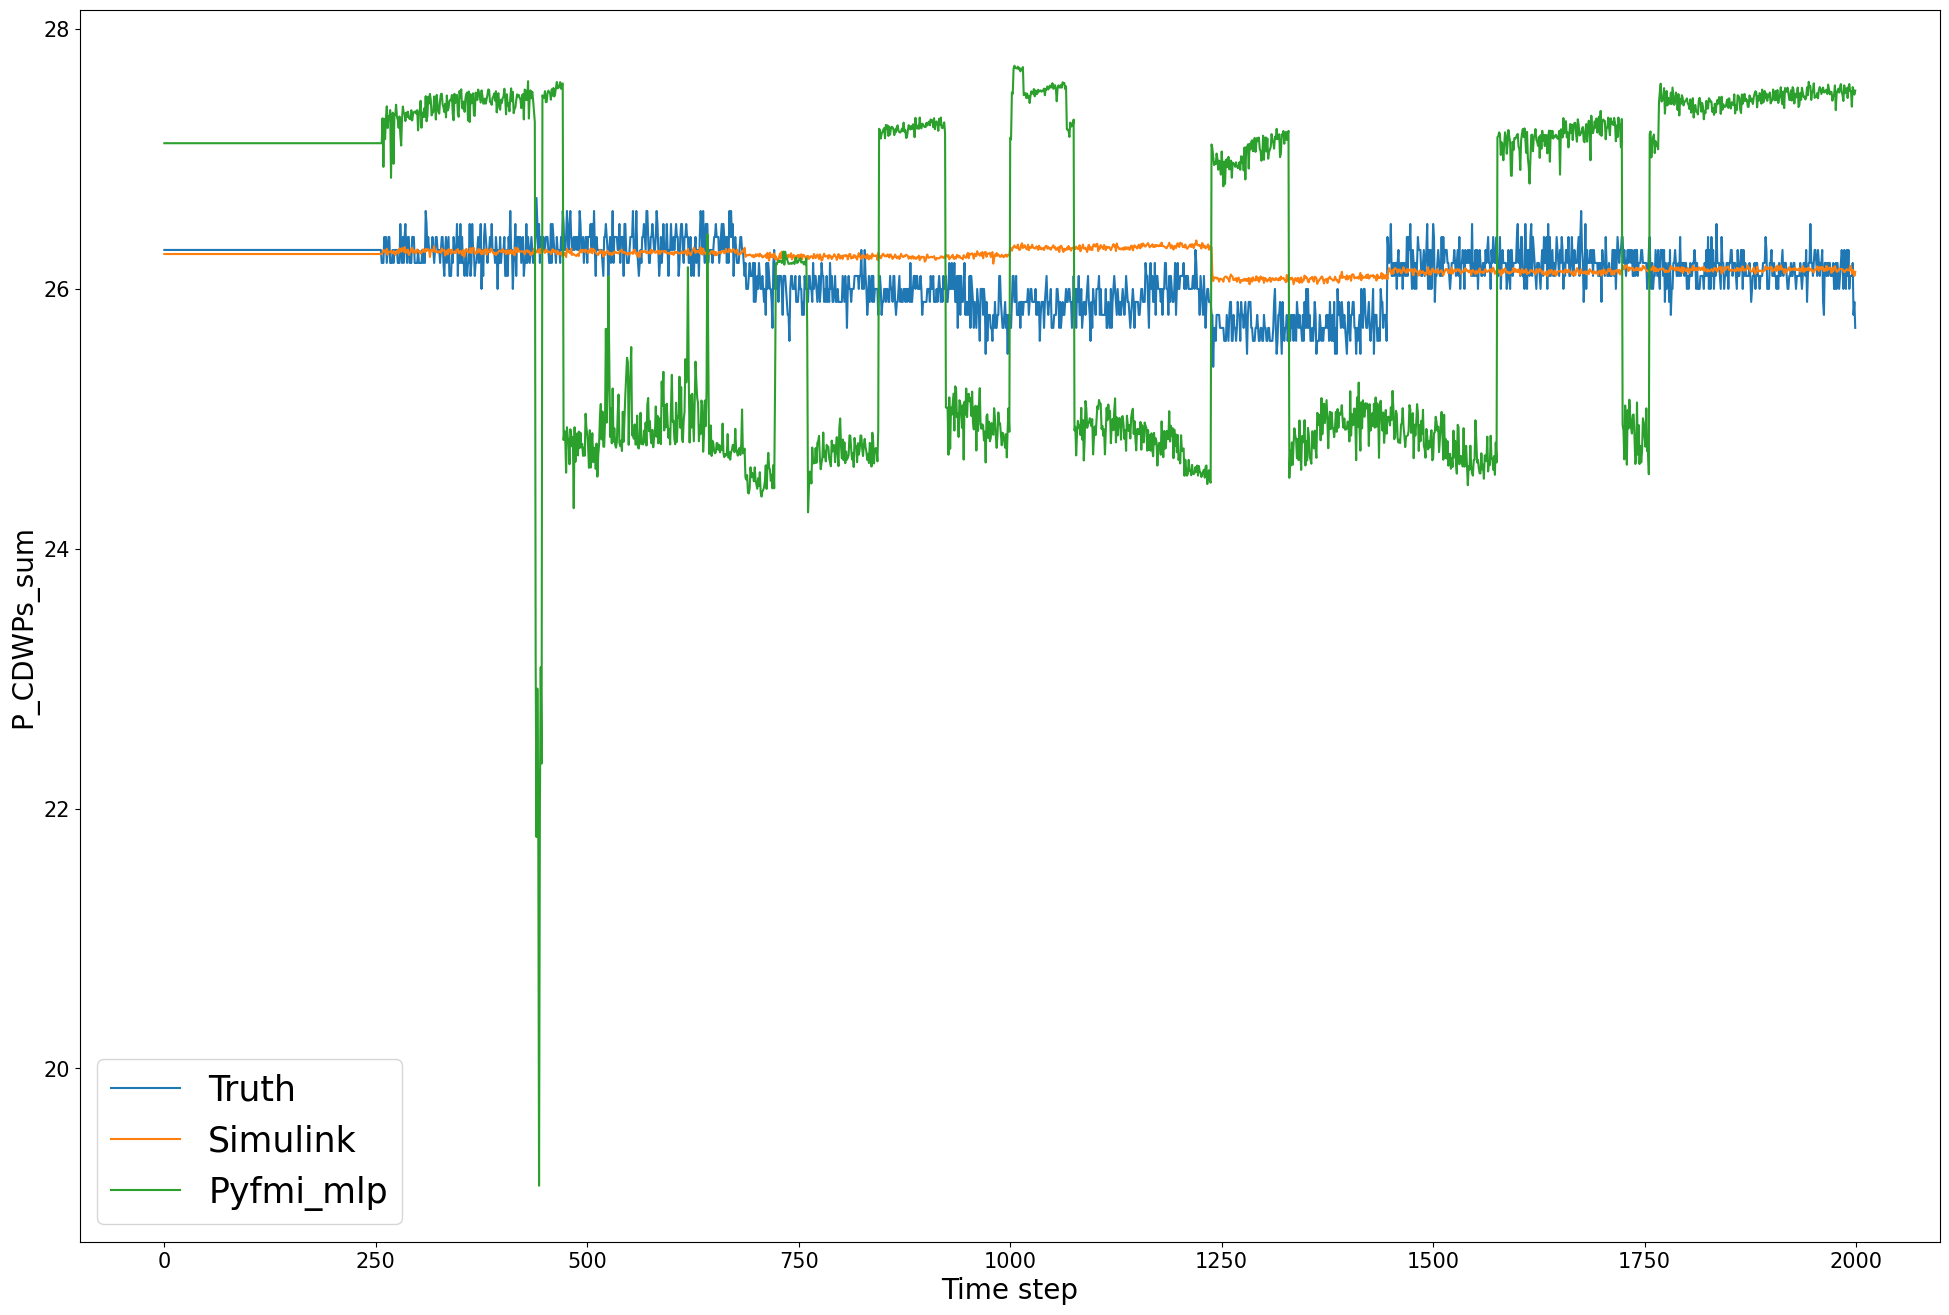

In [14]:
plt.figure(figsize=(24, 16))
plt.plot(range(0,2000),df_truth['P_CDWPs_sum'].iloc[1:2001], label='Truth')
plt.plot(range(0,2000),df_simulink['Pcdwp_sum'].iloc[1:2001], label='Simulink')

plt.plot(range(0,2000),df_pyfmi_mlp['P_CDWPs_sum'].iloc[0:2000]/1000, label='Pyfmi_mlp')
plt.legend(fontsize=25)
# plt.title('Simulink vs. Pyfmi P_CDWPs_sum Comparative Analysis',fontsize=30)
plt.xlabel('Time step', fontsize=20)
plt.ylabel('P_CDWPs_sum', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

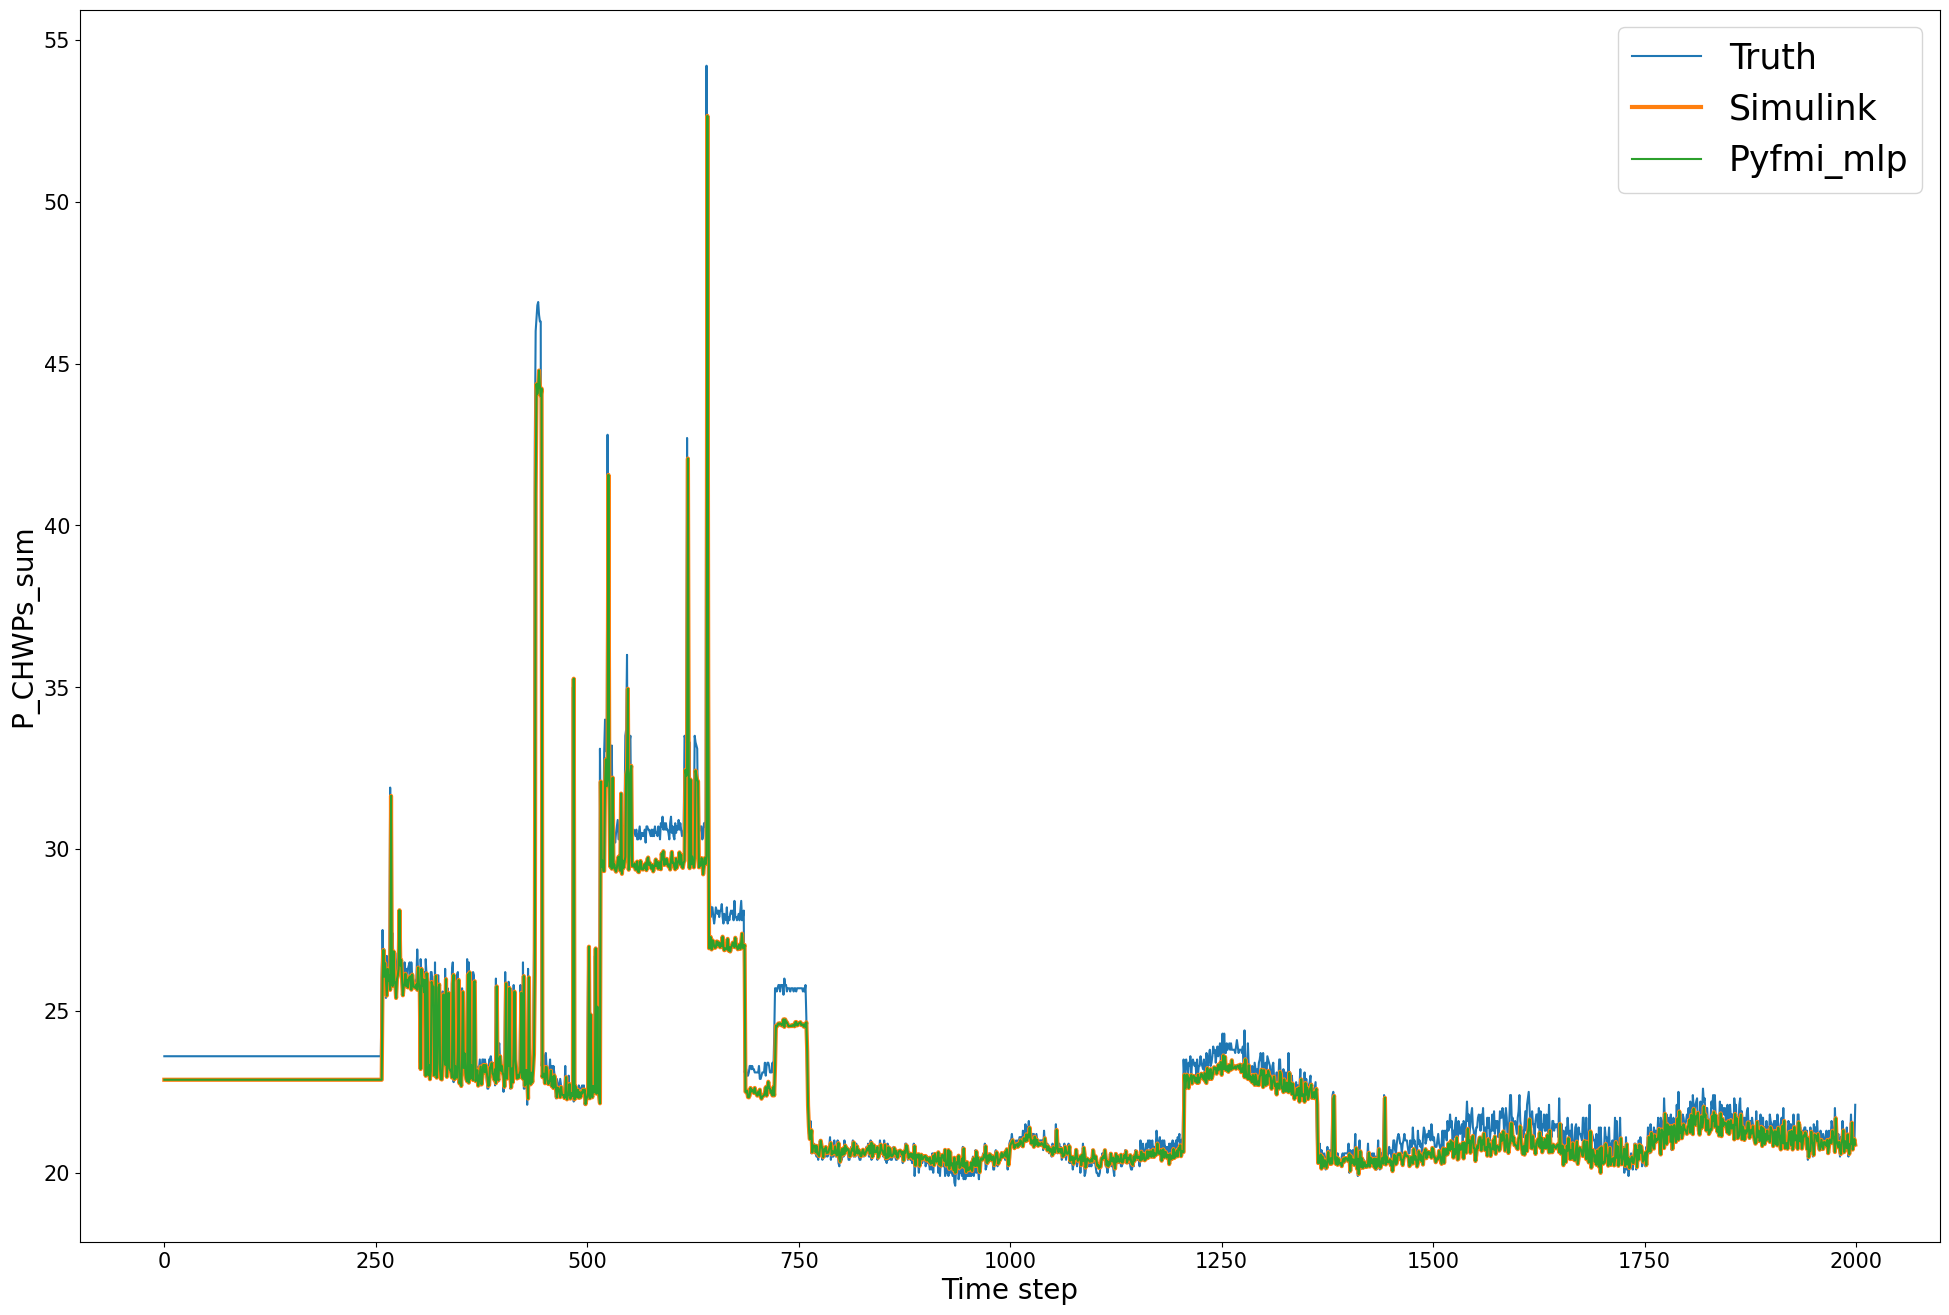

In [15]:
plt.figure(figsize=(24, 16))
plt.plot(range(0,2000),df_truth['P_CHWPs_sum'].iloc[1:2001], label='Truth')
plt.plot(range(0,2000),df_simulink['Pchwp_sum'].iloc[1:2001], label='Simulink',lw=3)

plt.plot(range(0,2000),df_pyfmi_mlp['P_CHWPs_sum'].iloc[0:2000]/1000, label='Pyfmi_mlp')
plt.legend(fontsize=25)
# plt.title('Simulink vs. Pyfmi P_CDWPs_sum Comparative Analysis',fontsize=30)
plt.xlabel('Time step', fontsize=20)
plt.ylabel('P_CHWPs_sum', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()